# setting

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [2]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [4]:
pip install sdv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 9.2 MB/s 
     |████████████████████████████████| 47 kB 5.3 MB/s 
     |████████████████████████████████| 1.6 MB 39.3 MB/s 
     |████████████████████████████████| 61 kB 330 kB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 139 kB 47.2 MB/s 
     |████████████████████████████████| 9.4 MB 42.0 MB/s 
     |████████████████████████████████| 295 kB 60.7 MB/s 
     |████████████████████████████████| 965 kB 53.3 MB/s 
     |████████████████████████████████| 280 kB 76.7 MB/s 
     |████████████████████████████████| 662 kB 57.4 MB/s 
     |████████████████████████████████| 15.3 MB 623 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: psutil
    Found existing installation: ps

# input data

In [28]:
## sdv ##
from sdv.tabular import GaussianCopula # Importing 'GaussianCoupla' Model
from sdv.tabular import CTGAN # Importing 'CTGAN' Model
from sdv.tabular import CopulaGAN # Importing 'CopulaGAN' Model
from sdv.evaluation import evaluate # Importing 'evaluate' Class for Synthetic Dataset Evaluation

## seed ##
import numpy as np
import torch
import torch.backends.cudnn as cudnn
import random
np.random.seed(1)
torch.manual_seed(1)
random.seed(1)
torch.cuda.manual_seed(1)
torch.cuda.manual_seed_all(1)
import warnings
warnings.filterwarnings('ignore')

In [8]:
!python --version

Python 3.8.16


In [13]:
sdv.__version__

'0.17.2'

# 방법 1

In [82]:
# trainx = preprocessing('drive/MyDrive/dacon/gan/상추/train_input/*.csv')
case13 = pd.read_csv('drive/MyDrive/dacon/gan/상추/train_input/CASE_13.csv')

In [62]:
case12 = pd.read_csv('drive/MyDrive/dacon/gan/상추/train_input/CASE_12.csv')

In [63]:
day0 = case12[case12['DAT']==0].reset_index(drop=True)
day0 = day0[['obs_time','내부온도관측치','내부습도관측치','co2관측치','ec관측치','시간당분무량','시간당백색광량','시간당적색광량','시간당청색광량']]
day0.describe()

,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,시간당백색광량,시간당적색광량,시간당청색광량
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,11.500000,25.752778,52.421806,478.541667,0.782620,544.708333,8614.490083,729.697850,1246.672917
std,7.071068,3.416357,5.568572,90.624511,0.006374,357.051023,8726.270560,824.463416,1438.662048
min,0.000000,21.595000,46.270001,391.266667,0.773943,0.000000,0.000000,0.000000,0.000000
25%,5.750000,22.477500,47.193333,417.275000,0.778636,0.000000,0.000000,0.000000,0.000000
50%,11.500000,25.155000,51.657500,438.008333,0.780907,769.000000,6440.369150,425.283600,402.590500
75%,17.250000,29.170000,58.511667,527.175000,0.786497,769.000000,18255.190000,1369.760700,2837.323125
max,23.000000,30.453333,60.851667,713.033333,0.799096,769.000000,18255.190000,2616.238800,3565.354000


In [83]:
day0 = case13[case13['DAT']==0].reset_index(drop=True)
day0 = day0[['obs_time','내부온도관측치','내부습도관측치','co2관측치','ec관측치','시간당분무량','시간당백색광량','시간당적색광량','시간당청색광량']]
day0.describe()

,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,시간당백색광량,시간당적색광량,시간당청색광량
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0,24.00000,24.0
mean,11.500000,24.705941,51.629050,428.263265,2.511012,938.260417,0.0,7405.23000,0.0
std,7.071068,1.983159,4.738701,16.052775,0.029869,632.462456,0.0,2969.93358,0.0
min,0.000000,19.884313,42.955000,403.816667,2.458555,0.000000,0.0,0.00000,0.0
25%,5.750000,24.959768,49.172047,415.673182,2.483833,547.815000,0.0,7901.67000,0.0
50%,11.500000,25.115417,50.512418,430.621429,2.515994,1229.360000,0.0,8439.48000,0.0
75%,17.250000,26.000939,54.262318,442.959703,2.529076,1435.120000,0.0,8935.92000,0.0
max,23.000000,26.368421,61.298800,449.901961,2.559928,2030.510000,0.0,9928.80000,0.0


In [64]:
day0_time02 = day0[day0['obs_time']==0]

In [84]:
day0_time0

,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,시간당백색광량,시간당적색광량,시간당청색광량
0,0,20.47551,57.14625,444.836735,2.548114,1120.05,0,496.44,0.0


In [85]:
pd.concat([day0_time0,day0_time0])

,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,시간당백색광량,시간당적색광량,시간당청색광량
0,0,20.47551,57.14625,444.836735,2.548114,1120.05,0,496.44,0.0
0,0,20.47551,57.14625,444.836735,2.548114,1120.05,0,496.44,0.0


In [86]:
model2 = CTGAN(epochs = 500)
model2.fit(pd.concat([day0_time0,day0_time0]))

In [87]:
ctgan2 = model2.sample(100,randomize_samples=0)

In [53]:
# a 개를 랜덤으로 뽑았을때, obs_time 다 나오는 시드/
i = 0
while True :
    ctgan2 = model2.sample(150,randomize_samples=i)
    if ctgan2['obs_time'].nunique() == 24 :
        print(i)
        break
    i += 1
## 결론 : 나오긴 하는데 시간 오래걸리고, 무논리, 발표때 까일듯.
## 200 부터는 앵간하면 obstime  다 나옴

19


In [ ]:
day0[day0['obs_time']==0]

In [ ]:
ctgan2[ctgan2['obs_time']==0].describe()

In [81]:
ctgan2[ctgan2['obs_time']==0].quantile(q=0.50, interpolation='nearest')

obs_time      0.000000
내부온도관측치      21.082816
내부습도관측치      54.567043
co2관측치      442.851080
ec관측치         1.992321
시간당분무량      992.800000
시간당백색광량       0.000000
시간당적색광량     436.570000
시간당청색광량       0.000000
Name: 0.5, dtype: float64

In [79]:
np.insert(ctgan2[ctgan2['obs_time']==0].max().values,0,1)

array([1.00000000e+00, 0.00000000e+00, 2.29583333e+01, 5.71462501e+01,
       4.44836735e+02, 2.54811377e+00, 1.12005000e+03, 0.00000000e+00,
       4.96440000e+02, 0.00000000e+00])

In [ ]:
day0.loc[len(day0)] = ctgan2[ctgan2['obs_time']==0].max().values

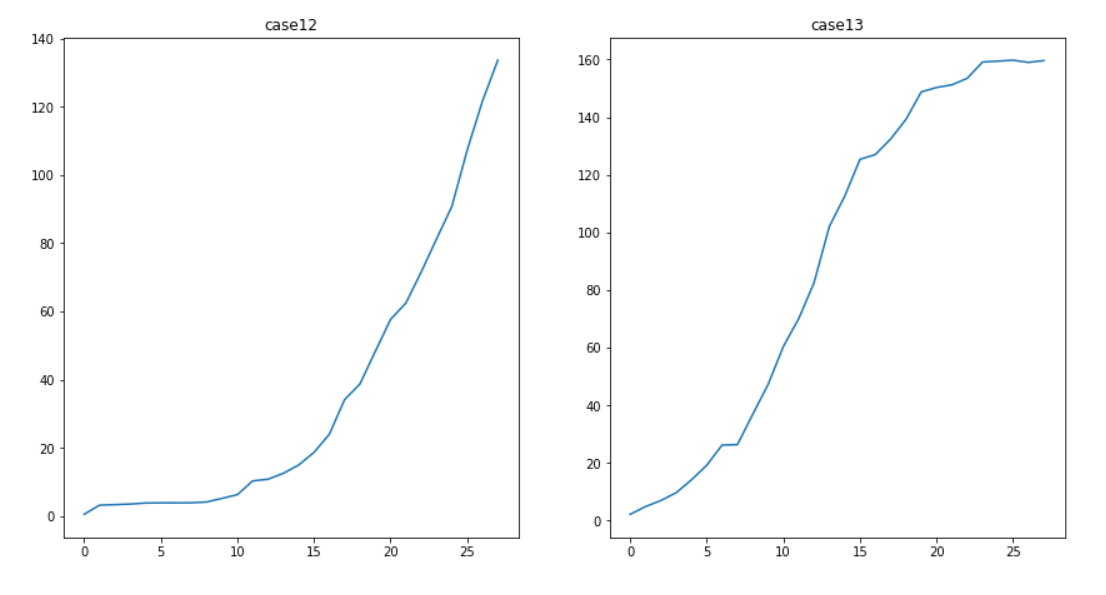

In [ ]:
# day 0 -> case 중 성장률 가장 높았던 k 개 넣어줌 #
# 시간대별 조합 다 test 해 봄 #
# day n -> case 중 성장률 가장 높았던 k 개 넣어줌 #

def Combination_setting(df):
    '''
    df 에는 ctgan 에서 만든 model.sample(n) 이 들어온다
    df를 obs_time 으로 나눠주고 조합한 경우 case 를 다르게 해서 day n 을 만들어 준다
    
    만약 0~5 까지는 값이 1개고 6~23 까지 값이 2개씩 존재한다면, 만들어지는 경우의 수는 => 1**6 * 2**18 => 262144 
    => 근데 이러면 경우의 수 넘 많음
    => obs_time 별 2개씩 사용할 경우 : 16777216 가지
    => 특정 시간대는 값을 고정한다 ( gan data 혹은 input data로 )
    => 나머지는 평균, min, max, 25%, 75 % ==> 59604644775390625 가지 @^_^@
    
    '''
    obs_time = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    return_df = pd.DataFrame(columns = ['DAT', 'obs_time', '내부온도관측치', '내부습도관측치','co2관측치', 
                                        'ec관측치', '시간당분무량', '시간당백색광량',  '시간당적색광량',  '시간당청색광량' ])
    
    for time in obs_time :

        v1 = df[df['obst_time'] == time].min().values
        v2 = df[df['obst_time'] == time].max().values
        v3 = df[df['obst_time'] == time].mean().values
        v4 = df[df['obst_time'] == time].quantile(q=0.25, interpolation='nearest').values
        v5 = df[df['obst_time'] == time].quantile(q=0.75, interpolation='nearest').values

        return_df.loc[len(return_df)] = v1
        return_df.loc[len(return_df)] = v2
        return_df.loc[len(return_df)] = v3
        return_df.loc[len(return_df)] = v4
        return_df.loc[len(return_df)] = v5

    return return_df

def Combination_make(df):


In [91]:
5**24

59604644775390625

# 방법 2

In [119]:
def make_dataset(input_path):
    train = pd.DataFrame()
    x = pd.read_csv(input_path)
    x = x[['obs_time','내부온도관측치','내부습도관측치','co2관측치','ec관측치','시간당분무량','시간당백색광량','시간당적색광량','시간당청색광량']]
    col_list = x.columns[1:]
    for i in range(0,28) :
        day = x.iloc[24*i:24*i+24]
        time_list = day['obs_time'].unique()
        for t in range(0,len(time_list)):
            for col in col_list:
                time = time_list[t]
                value1 = day[day['obs_time']==time][col].iloc[0]
                x[col+str(time)] = value1
        nx = x.iloc[:1,9:]
        train = pd.concat([train,nx]).reset_index(drop=True)
    return train

In [120]:
case13 = make_dataset('drive/MyDrive/dacon/gan/상추/train_input/CASE_13.csv')
case14 = make_dataset('drive/MyDrive/dacon/gan/상추/train_input/CASE_14.csv')

In [121]:
case13.head()

,내부온도관측치0,내부습도관측치0,co2관측치0,ec관측치0,시간당분무량0,시간당백색광량0,시간당적색광량0,시간당청색광량0,내부온도관측치1,내부습도관측치1,...,시간당적색광량22,시간당청색광량22,내부온도관측치23,내부습도관측치23,co2관측치23,ec관측치23,시간당분무량23,시간당백색광량23,시간당적색광량23,시간당청색광량23
0,20.475510,57.146250,444.836735,2.548114,1120.05,0,496.44,0.0,20.040385,61.240953,...,8604.96,0.0,25.016667,42.955000,448.983333,2.522624,769.00,0,9763.32,0.0
1,20.660870,55.565641,452.369565,2.528531,762.57,0,330.96,0.0,20.096154,62.161536,...,7943.04,0.0,24.920000,29.052727,429.709091,2.568666,1512.28,0,9266.88,0.0
2,19.861702,42.793617,435.510638,2.582881,588.96,0,165.48,0.0,19.035555,45.897778,...,9928.80,0.0,24.924138,33.368966,453.241379,2.594758,1210.07,0,9763.32,0.0
3,20.089655,46.191379,458.362069,2.608624,653.26,0,165.48,0.0,19.123636,50.169091,...,8935.92,0.0,25.079167,39.052083,440.666667,2.608792,1306.52,0,7612.08,0.0
4,20.925581,51.788372,450.930233,2.609848,769.00,0,165.48,0.0,20.122000,58.074000,...,9763.32,0.0,24.974138,50.317242,426.396552,2.640891,1409.40,0,9763.32,0.0


In [122]:
model2 = CTGAN(epochs = 50)
model2.fit(pd.concat([case13.iloc[:1],case14.iloc[:1]])) # day0 인 경우

In [123]:
ctgan2 = model2.sample(100,randomize_samples=0)
ctgan2.head()

,내부온도관측치0,내부습도관측치0,co2관측치0,ec관측치0,시간당분무량0,시간당백색광량0,시간당적색광량0,시간당청색광량0,내부온도관측치1,내부습도관측치1,...,시간당적색광량22,시간당청색광량22,내부온도관측치23,내부습도관측치23,co2관측치23,ec관측치23,시간당분무량23,시간당백색광량23,시간당적색광량23,시간당청색광량23
0,20.475510,63.018465,444.836735,2.555448,595.39,0,350.89,0.0,20.040385,68.701538,...,8604.9600,3188.447481,25.042609,43.294918,448.983333,2.695068,769.0,0,0.000000,8929.05
1,20.802650,64.119231,437.230769,2.567479,595.39,0,329.95,0.0,20.040385,68.701538,...,0.0000,0.000000,25.016667,42.955000,448.983333,2.522624,769.0,0,4529.721098,8929.05
2,20.475510,64.119231,437.230769,2.548114,753.51,0,0.00,13.2,20.040385,68.701538,...,0.0000,0.000000,25.016667,42.955000,448.281892,2.695068,769.0,0,0.000000,8929.05
3,20.973077,64.119231,438.427814,2.548114,957.34,0,0.00,0.0,20.062770,68.701538,...,0.0000,0.000000,25.063793,43.485130,442.241379,2.695068,769.0,0,0.000000,8929.05
4,20.475510,64.119231,437.230769,2.682889,595.39,0,0.00,0.0,20.040385,64.812411,...,1940.1589,615.886982,25.016667,44.328133,448.983333,2.522624,769.0,0,0.000000,8929.05


In [155]:
len(ctgan2.values)

100

In [156]:
def make_raw (df, day) :
    df_numpy = df.values
    return_arr = []
    for time in range(0,24):
        arr = []
        for i in range(len(df_numpy)) :
            now = df_numpy[i]
            for j in range(24):
                value = np.insert(now[j*8:j*8+8],0, int(day)) # dat
                value = np.insert(value , 1 ,int(j)) # obs_time
                value = np.insert(value , 0 ,int(i)) # case
                return_arr.append(value.tolist())

    return_df = pd.DataFrame(np.array(return_arr),columns = ['Case','DAT', 'obs_time', '내부온도관측치', '내부습도관측치','co2관측치', 
                                        'ec관측치', '시간당분무량', '시간당백색광량',  '시간당적색광량',  '시간당청색광량' ])
    
    return_df['시간당총광량'] = return_df['시간당백색광량'] + return_df['시간당적색광량'] + return_df['시간당청색광량']

    cumsum_list = ['일간누적분무량', '일간누적백색광량', '일간누적적색광량', '일간누적청색광량', '일간누적총광량']
    per_time_list = ['시간당분무량', '시간당백색광량', '시간당적색광량', '시간당청색광량', '시간당총광량']

    for i in range(0, 5):
        col1 = cumsum_list[i]
        col2 = per_time_list[i]
        return_df[col1] = 0
        return_df[col1] = return_df.groupby((return_df.obs_time == 0).cumsum()).agg(col2).cumsum()

    return_df = return_df[['Case', 'DAT', 'obs_time', '내부온도관측치', '내부습도관측치', 'co2관측치', 'ec관측치', '시간당분무량',
             '일간누적분무량', '시간당백색광량', '일간누적백색광량', '시간당적색광량', '일간누적적색광량', '시간당청색광량',
             '일간누적청색광량', '시간당총광량', '일간누적총광량']]

    return return_df

In [157]:
make_raw(ctgan2,0)

,Case,DAT,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,일간누적분무량,시간당백색광량,일간누적백색광량,시간당적색광량,일간누적적색광량,시간당청색광량,일간누적청색광량,시간당총광량,일간누적총광량
0,0.0,0.0,0.0,20.475510,63.018465,444.836735,2.555448,595.39000,595.390000,0.0,0.0,350.890000,350.890000,0.00,0.00,350.890000,350.890000
1,0.0,0.0,1.0,20.040385,68.701538,431.115385,2.552472,0.00000,595.390000,0.0,0.0,0.000000,350.890000,0.00,0.00,0.000000,350.890000
2,0.0,0.0,2.0,20.044145,61.298800,427.644089,2.583507,1486.56000,2081.950000,0.0,0.0,4332.780000,4683.670000,0.00,0.00,4332.780000,4683.670000
3,0.0,0.0,3.0,20.886364,57.910060,441.888487,2.687367,0.00000,2081.950000,0.0,0.0,6961.900911,11645.570911,0.00,0.00,6961.900911,11645.570911
4,0.0,0.0,4.0,24.992308,51.571154,426.830867,2.542897,0.00000,2081.950000,0.0,0.0,8274.000000,19919.570911,0.00,0.00,8274.000000,19919.570911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57595,99.0,0.0,19.0,26.094828,52.310714,420.068965,2.550718,769.00000,18450.824065,0.0,0.0,0.000000,129877.241732,0.00,14026.99,0.000000,143904.231732
57596,99.0,0.0,20.0,25.980345,47.742857,428.173109,2.501589,1165.06000,19615.884065,0.0,0.0,4308.555451,134185.797184,0.00,14026.99,4308.555451,148212.787184
57597,99.0,0.0,21.0,25.902000,47.788000,435.380000,2.679941,0.00000,19615.884065,0.0,0.0,7322.697249,141508.494432,0.00,14026.99,7322.697249,155535.484432
57598,99.0,0.0,22.0,24.930909,45.855572,438.870370,2.516944,765.43368,20381.317745,0.0,0.0,0.000000,141508.494432,0.00,14026.99,0.000000,155535.484432
